In [1]:
from __future__ import division

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [3]:
import evaluation_util as eva
import experiment_util as exp
from pprint import pprint
import numpy as np
import pandas as pd
from collections import defaultdict, OrderedDict
from frozendict import frozendict
import operator as op
import os

gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.


In [4]:
from schlichtanders.mymatplotlib import Centre
from schlichtanders.mypandas import switch_index_to_column_level

In [7]:
__parent__ = os.path.realpath("..")

In [8]:
Hyper = exp.get_hyper()
folders = ["rerunold_almost_all"]
folders = ["windows_rerunold_all", "windows_rerunoldagain_radialflow_and_co"]
folders = [["experiment2", "windows_rerunold_all"],
           ["experiment2", "windows_rerun1"],
           ["experiment2", "windows_rerunoldagain_radialflow_and_co"],
           ["experiment2", "windows_rerunradialflow_all"],
           ["experiment2", "windows_reruntoy2d_all"],
           ["experiment2", "windows_final_hoffentlich"],
           ["experiment2", "windows_final_hoffentlich2"],
           ["experiment2", "windows_final_hoffentlich3_almost3"]]
folders = [os.path.join(__parent__, *f) for f in folders]

datasetnames = ["boston", "concrete", "energy", "kin8nm", "yacht", "toy2d"]
modelnames = "baseline", "baselinedet", "planarflow", "planarflowdet", "radialflow", "radialflowdet"
n_normflows = [2,4,8,16]

In [9]:
modelnames_without_basedet = ("baseline", "planarflow", "planarflowdet", "radialflow", "radialflowdet")

# check number of hyperparameters looked at

In [10]:
folders_old = [["experiment1","first_useful_hyperparameter_search"], ['experiment1','run_windows'], ["experiment1","withpercent"]]
folders_old = [os.path.join(__parent__, *fo) for fo in folders_old]

## counting different hypers

In [11]:
old_repeated_hypers = eva.get_repeated_hypers(
    folders_old,
    attrs_key = ("opt_decay", "minus_log_s1", "batch_size"), #"n_normflows" "modelname","init_parameters"
    version_fix=lambda h: eva.version_fix(h, "baseline"),
    check_finite_test_values=False,
)

old_repeated_hypers_withinitparams = eva.get_repeated_hypers(
    folders_old,
    attrs_key = ("opt_decay", "minus_log_s1", "batch_size", "init_parameters"), #"n_normflows" "modelname","init_parameters"
    version_fix=lambda h: eva.version_fix(h, "baseline"),
    check_finite_test_values=False,
)
len(old_repeated_hypers), len(old_repeated_hypers_withinitparams), len(old_repeated_hypers_withinitparams)/len(old_repeated_hypers)

(758, 4201, 5.54221635883905)

In [ ]:
per_dataset = defaultdict(lambda:0)
for hs in old_repeated_hypers:
    dsnames = {h.datasetname if hasattr(h, 'datasetname') else "toy%id" % h.dim for h in old_repeated_hypers[hs]}
    for dn in dsnames:
        per_dataset[dn] += 1
    
per_dataset_withinitparams = defaultdict(lambda:0)
for hs in old_repeated_hypers_withinitparams:
    dsnames = {h.datasetname if hasattr(h, 'datasetname') else "toy%id" % h.dim
               for h in old_repeated_hypers_withinitparams[hs]}
    for dn in dsnames:
        per_dataset_withinitparams[dn] += 1

In [ ]:
per_dataset

In [ ]:
per_dataset_withinitparams

## counting table rows

# Read Data Into Pandas

In [12]:
reload(eva)

<module 'evaluation_util' from '/home/stephan/GitProjects/theano_models/experiments/experiment2/__file__'>

In [13]:
best_hypers = eva.get_best_new_hypers(
    folders, Hypers=[Hyper], test_attrs=["best_val_error"],
    datasetnames=datasetnames,
    n_normflows=n_normflows,
    modelnames=modelnames
)

ensured finite values


In [14]:
repeated_hypers = eva.get_repeated_hypers(
    folders, Hypers=[Hyper], 
    attrs_key=("datasetname", "modelname",
        "opt_decay", "minus_log_s1", "batch_size",  #"opt_identifier", "opt_offset", "opt_momentum",
        "n_normflows", "adapt_prior"),
    for_given_hypers_only=best_hypers
)

ensured finite values


In [15]:
keys_len1 = []
for key in repeated_hypers:
    if len(repeated_hypers[key]) <= 1:
        keys_len1.append(key)
for key in keys_len1:
    del repeated_hypers[key]

In [16]:
print len(best_hypers), len(repeated_hypers)

144 144


In [17]:
for hs in repeated_hypers.values():
    if len(hs) < 15:
        print len(hs), hs[0].datasetname, hs[0].modelname, hs[0].n_normflows

14 yacht radialflow 16


In [18]:
print keys_len1
print map(len, repeated_hypers.values())

[]
[54, 36, 34, 26, 23, 44, 43, 29, 32, 41, 53, 32, 38, 39, 37, 40, 27, 21, 33, 48, 42, 36, 19, 16, 37, 36, 33, 19, 39, 59, 30, 20, 42, 21, 30, 44, 33, 38, 26, 35, 33, 33, 31, 41, 23, 44, 35, 44, 36, 23, 29, 38, 18, 41, 41, 38, 34, 32, 35, 21, 32, 15, 78, 38, 20, 33, 43, 37, 38, 29, 55, 30, 31, 45, 30, 39, 23, 39, 34, 30, 40, 44, 31, 40, 37, 76, 70, 30, 38, 54, 25, 41, 31, 37, 28, 31, 38, 15, 30, 47, 59, 39, 35, 30, 31, 40, 44, 39, 37, 27, 33, 40, 30, 34, 29, 36, 30, 28, 31, 14, 30, 15, 32, 55, 58, 66, 33, 37, 41, 41, 19, 34, 49, 40, 23, 47, 37, 39, 36, 20, 44, 20, 20, 51]


In [19]:
len(repeated_hypers), len(datasetnames)*len(modelnames)*len([2,4,8,16])

(144, 144)

In [20]:
take_n = 10
pandas_dict_repeated = defaultdict(list)
for key in repeated_hypers:
    h = repeated_hypers[key][0]
    for k, v in h.__dict__.iteritems():
        if k.startswith("_"):
            continue
        pandas_dict_repeated[k].append(v)
    pandas_dict_repeated["repetitions"].append(repeated_hypers[key][:take_n])

In [21]:
df_repeated = pd.DataFrame(pandas_dict_repeated)
df_repeated

,adapt_prior,annealing_T,batch_size,best_epoch,best_parameters,best_test_error,best_test_loss,best_val_error,best_val_loss,datasetname,...,opt_step_rate,optimization_type,output_transfer,percent,repetitions,train_loss,units_per_layer,units_per_layer_plus,val_loss,w_true
0,True,100,10,599,"[-0.482834136925, -5.69077968974, -1.414213478...",3.414133,0.656428,4.659148,8.323000e-01,boston,...,0.0010,annealing,identity,1.0,"[hyper 8755088483793, hyper 8755088483589, hyp...",[],50.0,1050.0,"[7270.59925808, 9560.29286319, 2705.3602209, 4...",NaN
1,True,100,100,134,"[-1.01397682888, -0.975860167481, 0.0475192070...",0.275683,0.104320,0.268452,7.044975e-02,toy2d,...,0.0100,annealing,None,1.0,"[hyper 8755086343713, hyper 8755089323037, hyp...",[],NaN,NaN,"[161.340841044, 32.0480809256, 89.3145552534, ...",0.0
2,False,100,10,147,"[-0.605932918799, -0.70847336369, -0.739902423...",0.101381,0.473277,0.098386,4.417185e-01,kin8nm,...,0.0010,annealing,identity,1.0,"[hyper 8755087939297, hyper 8755087939113, hyp...",[],50.0,250.0,"[20122.7651731, 1976.22059227, 393.868820429, ...",NaN
3,False,100,100,280,"[0.408667130122, -0.856400998557, -0.879511113...",7.545540,2.090968,7.784213,2.301675e+00,boston,...,0.0100,annealing,identity,1.0,"[hyper 8755087743653, hyper 8755087345109, hyp...",[],50.0,850.0,"[6224554.71077, 11587380.1985, 8829359.66106, ...",NaN
4,False,100,10,225,"[-0.505700716568, -0.601569767485, -0.66446463...",12.391658,0.792123,12.322639,5.731703e-01,concrete,...,0.0001,annealing,identity,1.0,"[hyper 8755087505513, hyper 8755087489045, hyp...",[],50.0,450.0,"[224888.056438, 51966.2793815, 9401.77845637, ...",NaN
5,True,100,10,362,"[-0.631325296101, -0.621556015822, -1.31591849...",0.104220,0.501477,0.100255,4.516659e-01,kin8nm,...,0.0010,annealing,identity,1.0,"[hyper 8755089439237, hyper 8755088247653, hyp...",[],50.0,250.0,"[2287.6351326, 689.165376727, 377.862208835, 3...",NaN
6,False,100,100,37,"[0.904492390671, 0.807987559047, -0.8804644357...",17.681721,75881.009503,17.554092,inf,yacht,...,0.0100,annealing,identity,1.0,"[hyper 8755088029961, hyper 8755088070953, hyp...",[],50.0,150.0,"[1010089.91821, 877083.272406, 850168.112296, ...",NaN
7,True,100,10,53,"[-0.352803562546, -1.00900064125, -1.713232948...",0.300144,0.090811,0.329480,3.200241e-01,toy2d,...,0.0010,annealing,None,1.0,"[hyper 8755086343861, hyper 8755086446565, hyp...",[],NaN,NaN,"[9.73976433586, 1.86307323308, 76.198547552, 4...",0.0
8,False,100,1,10,"[-1.03966445941, -0.929858574892, -2.861415613...",0.306410,0.002304,0.272147,-2.664717e-03,toy2d,...,0.0010,annealing,None,1.0,"[hyper 8755086613017, hyper 8755086613081, hyp...",[],NaN,NaN,"[0.128704208306, -0.00245953496837, -0.0030672...",0.0
9,False,100,10,87,"[-0.732912028436, -0.252273999382, -0.46216002...",6.420885,0.619775,6.121315,4.925200e-01,concrete,...,0.0010,ml,identity,1.0,"[hyper 8755087962149, hyper 8755087505465, hyp...",[],50.0,450.0,"[3.82429094212, 2.19399286086, 1.71868076119, ...",NaN


# construct analysis dataframe

## performance analysis

In [31]:
def performance_measures(hypers):
    losses = np.array(list(h.best_test_loss for h in hypers))
    errors = np.array(list(h.best_test_error for h in hypers))
    epochs = np.array(list(h.best_epoch for h in hypers))
    disregard = (losses == np.inf) | (errors == np.inf)
    n = (~disregard).sum()
    losses[disregard] = np.nan
    errors[disregard] = np.nan
    print n,
    return {
#         "min" : [np.nanmin(errors), - np.nanmin(losses)],
        "mean": [np.nanmean(errors), -np.nanmean(losses)],
        "std" : [np.nanstd(errors, ddof=1), np.nanstd(losses, ddof=1)],
        "measure" : ["RMSE", "loglik"]
    }
    return {
        "min" : [np.nanmin(errors), - np.nanmin(losses), np.nanmin(epochs)],
        "mean": [np.nanmean(errors), -np.nanmean(losses), np.nanmean(epochs)],
        "std" : [np.nanstd(errors, ddof=1), np.nanstd(losses, ddof=1), np.nanstd(epochs, ddof=1)],
        "measure" : ["RMSE", "loglik", "epoch"]
    }
    return pd.Series({
        'mean_test_loss': np.nanmean(losses),
        'std_test_loss': np.nanstd(losses, ddof=1),
        'min_test_loss': np.nanmin(losses),
        'mean_test_error': np.nanmean(errors),
        'std_test_error': np.nanstd(errors, ddof=1),
        'min_test_error': np.nanmin(errors),
        'mean_epochs': np.nanmean(epochs),
        'std_epochs': np.nanstd(epochs, ddof=1),
        'min_epochs': np.nanmin(epochs),
        "n": n
    })

In [32]:
df_perform = df_repeated.repetitions.apply(performance_measures)
df_perform.name = "performance"
df_perform.shape

10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

(144,)

## Expressiveness Analysis

In [24]:
# modes = defaultdict(list)
# correlations = OrderedDict()
# toy_hist = OrderedDict()

def expressiveness_measures(hypers):
    hypers = hypers[:20]  # maximal 20 cases
    if hypers[0].modelname == "baselinedet":
        return pd.Series({'correlation':None, 'correlation_pos':None, 'modes':None, 'toy_hist':None})
        
    hypers_sorted = sorted([h for h in hypers
                            if h.best_test_loss != np.inf
                            and h.best_test_error != np.inf],
                           key=lambda h: h.best_test_error)
    print len(hypers_sorted),
    # inf only stands for interrupt, as otherwise each model trained so far
    
    d = {}
    # analysis on best result
    # -----------------------
    h = hypers_sorted[0]
    s = eva.sample_hyper(h)
    c = abs(eva.get_best_correlations(s))
    triu = c[np.triu_indices_from(c, k=1)]
    d['mean_abs_cor'] = [triu.mean()]
    d['max_abs_cor'] = [triu.max()]
    modes = [eva.get_nr_modes(s)]
    
    if "toy" in h.datasetname:
        if "2d" in h.datasetname:
            s = eva.sample_hyper(h, n_samples=10000)  # only for this more sample might in fact be useful
#         else reuse s from before
        d['toy_hist'] = eva.get_hist(s)
    else:
        d['toy_hist'] = None

    # analysis for non-best (only compute modes)
    # ------------------------------------------
    for h in hypers_sorted[1:]:
        s = eva.sample_hyper(h)
        m = eva.get_nr_modes(s)
        modes.append(m)
        
        c = abs(eva.get_best_correlations(s))
        triu = c[np.triu_indices_from(c, k=1)]
        d['mean_abs_cor'].append(triu.mean())
        d['max_abs_cor'].append(triu.max())
            
    d['modes'] = reduce(op.add, modes)
    return pd.Series(d)

In [34]:
df_express = df_repeated.repetitions.apply(expressiveness_measures)

10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10


In [33]:
df_express = pd.read_pickle("df_expressiveness_take10_maxtriu.pkl")

In [34]:
frames = [df_repeated, df_perform, df_express]
# frames = [df_repeated, df_perform]  # as expressiveness analysis takes a while to compute
df_analysis = pd.concat(frames, axis=1)

In [35]:
df_analysis.shape, df_repeated.shape, df_perform.shape, df_express.shape

((144, 44), (144, 37), (144,), (144, 6))

## take only the best baseline(det) per dataset

In [39]:
def replace_baseline_with_best_one(df):
    if df.modelname.isin(["baseline", "baselinedet"]).all():
        i = df.performance.apply(lambda p: p['mean'][0]).values.argmin() # index 0 stands for RMSE
        new_df = pd.DataFrame([df.iloc[i].values]*len(df), index=df.index, columns=df.columns)
        new_df.n_normflows = df.n_normflows
        return new_df
    return df

In [40]:
df_analysis_same_baseline = df_analysis.groupby(["datasetname", "modelname"]).apply(replace_baseline_with_best_one)

In [41]:
df_analysis_same_baseline.set_index(["datasetname", "modelname", "n_normflows"]).sort_index()

adapt_prior  annealing_T  batch_size  \
datasetname modelname     n_normflows                                        
boston      baseline      2                 False          100         100   
                          4                 False          100         100   
                          8                 False          100         100   
                          16                False          100         100   
            baselinedet   2                  True          100         100   
                          4                  True          100         100   
                          8                  True          100         100   
                          16                 True          100         100   
            planarflow    2                 False          100          10   
                          4                 False          100          10   
                          8                 False          100         100   
                          16                False          100         100   
            planarflowdet 2                 False          100          10   
                          4                 False          100          10   
                          8                  True          100         100   
                          16                 True          100         100   
            radialflow    2                  True          100          10   
                          4                 False          100          10   
                          8                  True          100          10   
                          16                False          100          10   
            radialflowdet 2                 False          100           1   
                          4                 False          100          10   
                          8                 False          100          10   
                          16                False          100         100   
concrete    baseline      2                  True          100          10   
                          4                  True          100          10   
                          8                  True          100          10   
                          16                 True          100          10   
            baselinedet   2                 False          100         100   
                          4                 False          100         100   
...                                           ...          ...         ...   
toy2d       radialflow    8                 False          100         100   
                          16                 True          100         100   
            radialflowdet 2                  True          100         100   
                          4                  True          100         100   
                          8                 False          100          10   
                          16                 True          100          10   
yacht       baseline      2                  True          100          10   
                          4                  True          100          10   
                          8                  True          100          10   
                          16                 True          100          10   
            baselinedet   2                  True          100          10   
                          4                  True          100          10   
                          8                  True          100          10   
                          16                 True          100          10   
            planarflow    2                 False          100         100   
                          4                 False          100          10   
                          8                 False          100           1   
                          16                False          100           1   
            planarflowdet 2                 False          1

# Latex Tables

## summary table of everything

In [160]:
table_datasetname = None # "energy"

In [161]:
import schlichtanders.mypandas
reload(schlichtanders.mypandas)
from schlichtanders.mypandas import flatten_out

In [162]:
short_versions = {
    "datasetname" : "dataset",
    "modelname" : "model",
    "n_normflows" : "nn"
}

In [163]:
index = ["datasetname", "modelname", "n_normflows"] if table_datasetname is None else ["modelname", "n_normflows"]
columns = ["performance"] # , "modes"

In [164]:
def flatten_out(*keys):
    def apply(s):
        s = s.iloc[0]
        d = s.to_dict()
        for key in keys:
            del d[key]
            d.update(s[key])
        return pd.DataFrame(d)
    return apply

In [165]:
sub_df = df_analysis_same_baseline
if table_datasetname is not None:
    sub_df = df_analysis_same_baseline[df_analysis_same_baseline.datasetname == table_datasetname]
df_table = sub_df[index + columns]
df_table = df_table.groupby(level=0).apply(flatten_out("performance"))
df_table = df_table.set_index(["measure"] + index).sort_index()

In [166]:
df_table = df_table.round(3) #{"mean":3, "min":3, "std":2, "modes":3})
df_table = df_table[["mean", "std"]]

In [167]:
df_table = switch_index_to_column_level(df_table, 0)
# df_table = switch_index_to_column_level(df_table, 0)

### add mean epoch

In [190]:
def mean_epoch(hypers):
    losses = np.array(list(h.best_test_loss for h in hypers))
    errors = np.array(list(h.best_test_error for h in hypers))
    epochs = np.array(list(h.best_epoch for h in hypers))
    disregard = (losses == np.inf) | (errors == np.inf)
#     losses[disregard] = np.nan
    errors[disregard] = np.nan
    return epochs[~disregard].mean()  # epochs[np.nanargmin(errors)]

In [169]:
sub_df = df_analysis_same_baseline
if table_datasetname is not None:
    sub_df = df_analysis_same_baseline[df_analysis_same_baseline.datasetname == table_datasetname]
df_table_epochs = sub_df[index + ["repetitions"]]
df_table_epochs["epochs"] = df_table_epochs.repetitions.apply(mean_epoch)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [170]:
df_table_epochs = df_table_epochs.set_index(index).sort_index()
df_table_epochs
df_table["epochs"] = df_table_epochs['epochs'].round(1)

### add modes

In [171]:
sub_df = df_analysis_same_baseline
if table_datasetname is not None:
    sub_df = df_analysis_same_baseline[df_analysis_same_baseline.datasetname == table_datasetname]
df_table_modes = sub_df[index + ["modes"]]
df_table_modes.modes = df_table_modes.modes.apply(lambda m: None if m is None else m[1]/sum(m.values()))

In [172]:
df_table_modes = df_table_modes.set_index(index).sort_index()
df_table_modes
df_table["modes"] = df_table_modes['modes'].round(2)

### add mean of max correlations

In [173]:
sub_df = df_analysis_same_baseline
if table_datasetname is not None:
    sub_df = df_analysis_same_baseline[df_analysis_same_baseline.datasetname == table_datasetname]
df_table_cor = sub_df[index + ["max_abs_cor"]]
df_table_cor.max_abs_cor = df_table_cor.max_abs_cor.apply(lambda c: None if c is None else np.mean(c))

In [174]:
df_table_cor = df_table_cor.set_index(index).sort_index()
df_table["cor"] = df_table_cor['max_abs_cor'].round(2)

In [175]:
df_table_latex = df_table.copy()
df_table_latex.index.names = map(short_versions.get, df_table.index.names)
print df_table_latex.to_latex()

\begin{tabular}{lllrrrrrrr}
\toprule
       &          &    &       RMSE &            &       loglik &              & epochs & modes &   cor \\
       &          &    &       mean &        std &         mean &          std &        &       &       \\
dataset & model & nn &            &            &              &              &        &       &       \\
\midrule
boston & baseline & 2  &      4.762 &      1.071 &       -1.474 &        0.208 &  271.9 &  1.00 &  0.15 \\
       &          & 4  &      4.762 &      1.071 &       -1.474 &        0.208 &  271.9 &  1.00 &  0.15 \\
       &          & 8  &      4.762 &      1.071 &       -1.474 &        0.208 &  271.9 &  1.00 &  0.15 \\
       &          & 16 &      4.762 &      1.071 &       -1.474 &        0.208 &  271.9 &  1.00 &  0.15 \\
       & baselinedet & 2  &      4.014 &      0.650 &       -0.563 &        0.181 &  109.6 &   NaN &   NaN \\
       &          & 4  &      4.014 &      0.650 &       -0.563 &        0.181 &  109.6 &   NaN &

## Table summarizing best values

In [326]:
best_what = "loglik"  #"loglik" #'RMSE'
best_i = 0 if best_what == "RMSE" else 1

In [327]:
df_table_best = df_analysis_same_baseline[["datasetname","modelname", "performance"]]

In [328]:
df_table_best.columns = ["dataset", "model", "performance"]

In [329]:
df_table_best["mean"] = df_table_best.performance.apply(lambda p: p['mean'][best_i])
df_table_best["std"] = df_table_best.performance.apply(lambda p: p['std'][best_i])
# df_table_best['loglik'] = df_table_best.performance.apply(lambda p: p['min'][1])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [330]:
del df_table_best["performance"]

In [331]:
df_table_best["nn"] = df_analysis_same_baseline["n_normflows"]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [332]:
df_table_best = df_table_best.round(3)

In [333]:
def get_best_nn(df):
    idx = df['mean'].idxmin() if best_what == "RMSE" else df['mean'].idxmax()
    return df.ix[idx]
df_table_best_grouped = df_table_best.groupby(["model", "dataset"]).apply(get_best_nn).set_index(["model", "dataset"])

In [334]:
df_table_best_grouped = switch_index_to_column_level(df_table_best_grouped, 0)
df_table_best_grouped

model    baseline              baselinedet             planarflow              \
             mean    std    nn        mean    std   nn       mean    std   nn   
dataset                                                                         
boston     -1.474  0.208   2.0      -0.563  0.181  4.0     -0.984  0.349  4.0   
concrete   -0.645  0.061  16.0      -0.319  0.170  4.0     -0.671  0.084  2.0   
energy     -0.245  0.070  16.0       1.321  0.184  4.0     -0.019  0.018  8.0   
kin8nm     -0.554  0.052   2.0      -0.266  0.024  4.0     -0.506  0.043  2.0   
toy2d      -0.129  0.059   8.0      -0.110  0.088  8.0     -0.004  0.011  2.0   
yacht      -0.302  0.243  16.0       1.159  0.264  4.0     -0.027  0.006  8.0   

model    planarflowdet             radialflow              radialflowdet  \
                  mean    std   nn       mean    std    nn          mean   
dataset                                                                    
boston          -1.357  0.788  4.0     -0.832  0.263   2.0         0.005   
concrete        -0.538  0.136  2.0     -2.710  1.450   4.0        -0.262   
energy           0.302  0.562  2.0     -1.537  3.179  16.0         1.504   
kin8nm          -0.384  0.095  2.0     -6.804  1.146   2.0        -0.238   
toy2d           -0.005  0.006  8.0     -0.071  0.075   4.0        -0.131   
yacht           -0.417  2.082  4.0     -1.915  0.187  16.0         1.052   

model                  
            std    nn  
dataset                
boston    0.015   2.0  
concrete  0.123   4.0  
energy    0.165   4.0  
kin8nm    0.050  16.0  
toy2d     0.064  16.0  
yacht     0.735   8.0

In [335]:
best_ranking = {}

for row in df_table_best_grouped.iterrows():
    row_name, row_content = row
    content = row_content.reset_index()
#     print content
#     print "--------%s----------" % row_name
#     print content[content.level_1=="mean"]
    _sub = content.ix[content.level_1=="mean", row_name]
    idx_best = _sub.idxmin() if best_what == "RMSE" else _sub.idxmax()
    idx_worst = _sub.idxmax() if best_what == "RMSE" else _sub.idxmin()
    #print "%-10s best: %-15s worst: %s" % (row_name, content.ix[idx_best].model, content.ix[idx_worst].model)
    sort = content[content.level_1=="mean"].sort_values(row_name, ascending=(best_what == "RMSE"))
    best_ranking[row_name] = sort.model.values
    print sort
    print

            model level_1  boston
15  radialflowdet    mean   0.005
3     baselinedet    mean  -0.563
12     radialflow    mean  -0.832
6      planarflow    mean  -0.984
9   planarflowdet    mean  -1.357
0        baseline    mean  -1.474

            model level_1  concrete
15  radialflowdet    mean    -0.262
3     baselinedet    mean    -0.319
9   planarflowdet    mean    -0.538
0        baseline    mean    -0.645
6      planarflow    mean    -0.671
12     radialflow    mean    -2.710

            model level_1  energy
15  radialflowdet    mean   1.504
3     baselinedet    mean   1.321
9   planarflowdet    mean   0.302
6      planarflow    mean  -0.019
0        baseline    mean  -0.245
12     radialflow    mean  -1.537

            model level_1  kin8nm
15  radialflowdet    mean  -0.238
3     baselinedet    mean  -0.266
9   planarflowdet    mean  -0.384
6      planarflow    mean  -0.506
0        baseline    mean  -0.554
12     radialflow    mean  -6.804

            model level_1  toy

In [336]:
df_ranking = pd.DataFrame( best_ranking)
df_ranking = df_ranking[["boston", "concrete", "energy", "kin8nm", "yacht", "toy2d"]]
print df_ranking.to_latex(index=True)  # index is replaced by best_what

\begin{tabular}{lllllll}
\toprule
{} &         boston &       concrete &         energy &         kin8nm &          yacht &          toy2d \\
\midrule
0 &  radialflowdet &  radialflowdet &  radialflowdet &  radialflowdet &    baselinedet &     planarflow \\
1 &    baselinedet &    baselinedet &    baselinedet &    baselinedet &  radialflowdet &  planarflowdet \\
2 &     radialflow &  planarflowdet &  planarflowdet &  planarflowdet &     planarflow &     radialflow \\
3 &     planarflow &       baseline &     planarflow &     planarflow &       baseline &    baselinedet \\
4 &  planarflowdet &     planarflow &       baseline &       baseline &  planarflowdet &       baseline \\
5 &       baseline &     radialflow &     radialflow &     radialflow &     radialflow &  radialflowdet \\
\bottomrule
\end{tabular}



In [337]:
print df_table_best_grouped.to_latex()

\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
model & baseline &        &       & baselinedet &        &      & planarflow &        &      & planarflowdet &        &      & radialflow &        &       & radialflowdet &        &       \\
{} &     mean &    std &    nn &        mean &    std &   nn &       mean &    std &   nn &          mean &    std &   nn &       mean &    std &    nn &          mean &    std &    nn \\
dataset  &          &        &       &             &        &      &            &        &      &               &        &      &            &        &       &               &        &       \\
\midrule
boston   &   -1.474 &  0.208 &   2.0 &      -0.563 &  0.181 &  4.0 &     -0.984 &  0.349 &  4.0 &        -1.357 &  0.788 &  4.0 &     -0.832 &  0.263 &   2.0 &         0.005 &  0.015 &   2.0 \\
concrete &   -0.645 &  0.061 &  16.0 &      -0.319 &  0.170 &  4.0 &     -0.671 &  0.084 &  2.0 &        -0.538 &  0.136 &  2.0 &     -2.710 &  1.450 &   4.0 &        -0.262 &  0

## list of highest variances

In [ ]:
df = df_analysis_same_baseline[["datasetname", "modelname", "n_normflows", "performance"]]
df['std_error'] = df_analysis_same_baseline.performance.apply(lambda p: p['std'][0])
df['std_loglik'] = df_analysis_same_baseline.performance.apply(lambda p: p['std'][1])

In [ ]:
df_variance_latex =  (
    df[["datasetname", "modelname", "n_normflows", "std_error", "std_loglik"]]
      [(df.std_error>100)|(df.std_loglik>100)].sort_values("std_error").round(3).set_index("datasetname").sort_index()
).round(1)
df_variance_latex

In [ ]:
print df_variance_latex.to_latex()

## list of best mode results

In [ ]:
df_table_modes_alone = df_analysis_same_baseline[["datasetname", "modelname", "n_normflows", "modes"]]
df_table_modes_alone['max'] = df_table_modes_alone.modes.apply(lambda m: -1 if m is None else max(m.keys()))
df_table_modes_alone['prop1'] = df_table_modes_alone.modes.apply(lambda m: None if m is None else m[1]/sum(m.values()))

In [ ]:
df_table_modes_alone_latex = (df_table_modes_alone[["datasetname", "modelname", "n_normflows", "max", "prop1"]]
 [df_table_modes_alone.prop1 < 0.95].sort_values("prop1")).round(2).set_index("datasetname").sort_index()
df_table_modes_alone_latex

In [ ]:
print df_table_modes_alone_latex.to_latex()

In [ ]:
df_table_modes_alone['n3'] = df_table_modes_alone.modes.apply(lambda d: None if d is None else d.get(3, None))

In [ ]:
df_table_modes_alone[~df_table_modes_alone.n3.isnull()]

# Visualize Results

## plot performance results with n_normflows on x-axis

For each dataset one figure (last plot can bear legend)

In [227]:
linestyles = ['--', '-', '--', ':']*4  # [u'--', u'-.', u'-', u':', "--", "-"]
markers = ["", "", "o", "."]*4  # ["o", "*"]*4 #Line2D.filled_markers
palette = {
    "baseline" : (0.5, 0.5, 0.5, 0.8),
    "baselinedet" : (0.6, 0.6, 0.6, 0.8),
#     "planarflow" : (0.0, 0.0, 1.0),
#     "planarflowdet" : (0.0, 0.4, 1.0),
    "planarflow" : (1.0, 0.0, 0.0),
    "planarflowdet" : (1.0, 0.4, 0.0),
    "radialflow" : (1.0, 0.0, 0.0),
    "radialflowdet" : (1.0, 0.4, 0.0),
}

In [234]:
type_flow = "planar"
if type_flow == "planar":
    sub_model_names = ["baseline", "baselinedet", "planarflow", "planarflowdet"]
elif type_flow == "radial":
    sub_model_names = ["baseline", "baselinedet", "radialflow", "radialflowdet"]
else: 
    raise ValueError("does not work")

In [235]:
legend_lines = []
for mn, ma, ls in zip(sub_model_names, markers, linestyles):
    l = Line2D([], [], color=palette[mn], marker=ma, linestyle=ls)
    legend_lines.append(l)

toy2d has no 16 version yet ... look into this

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


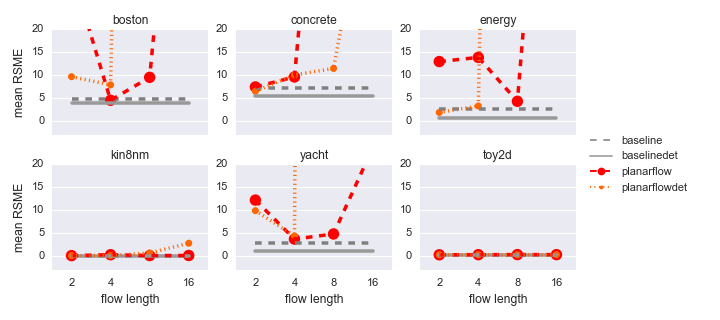

In [236]:
df = df_analysis_same_baseline[df_analysis_same_baseline.modelname.isin(sub_model_names)]
df['mean RSME'] = df.performance.apply(lambda p:p['mean'][0])
df.rename(columns={"n_normflows": "flow length"}, inplace = True)

g = sns.FacetGrid(df, col="datasetname", col_order=datasetnames, col_wrap=3, size=2, aspect=1.5,
                  ylim=[-3, 20], xlim=[2,16], sharey=False,
                  hue="modelname", palette=palette, hue_order=sub_model_names, hue_kws=dict(
    markers=markers[:len(sub_model_names)],
    linestyles=linestyles[:len(sub_model_names)]))
g.map(sns.pointplot, "flow length", 'mean RSME').set_titles(col_template="{col_name}")
g.fig.subplots_adjust(right=0.8)
# ax = g.fig.add_subplot(248)
# ax.axis("off"); ax.grid(False)
plt.legend(legend_lines, sub_model_names, loc="center", bbox_to_anchor=(1.4,1))

In [237]:
g.savefig("Images/take10_%s_RMSE.pdf" % type_flow)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


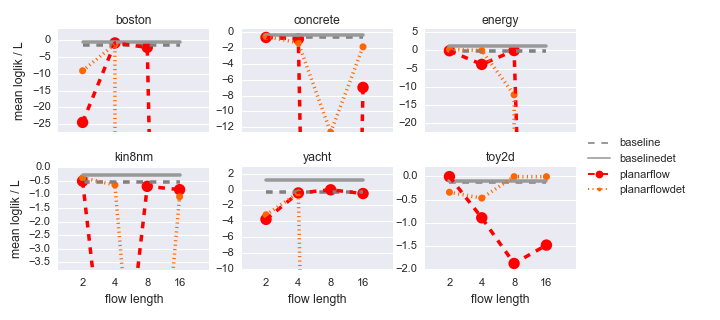

In [238]:
df = df_analysis_same_baseline[df_analysis_same_baseline.modelname.isin(sub_model_names)]
df['mean loglik / L'] = df.performance.apply(lambda p:p['mean'][1])
df.rename(columns={"n_normflows": "flow length"}, inplace = True)

g2 = sns.FacetGrid(df, col="datasetname", col_order=datasetnames, col_wrap=3, size=2, aspect=1.5,
                  ylim=[-10, 3], xlim=[2,16], sharey=False,
                  hue="modelname", palette=palette, hue_order=sub_model_names, hue_kws=dict(
    markers=markers[:len(sub_model_names)],
    linestyles=linestyles[:len(sub_model_names)]))
g2.map(sns.pointplot, "flow length", 'mean loglik / L').set_titles(col_template="{col_name}")
g2.fig.subplots_adjust(right=0.8)
# ax = g.fig.add_subplot(248)
# ax.axis("off"); ax.grid(False)
plt.legend(legend_lines, sub_model_names, loc="center", bbox_to_anchor=(1.4,1))

In [239]:
g2.savefig("Images/take10_%s_loglik.pdf" % type_flow)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


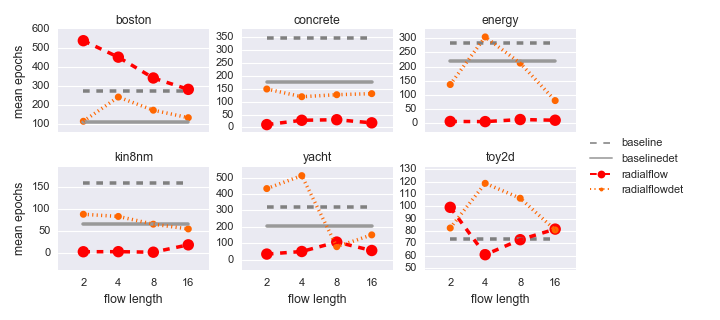

In [208]:
df = df_analysis_same_baseline[df_analysis_same_baseline.modelname.isin(sub_model_names)]
df["mean epochs"] = df.repetitions.apply(mean_epoch)
df.rename(columns={"n_normflows": "flow length"}, inplace = True)

g3 = sns.FacetGrid(df, col="datasetname", col_order=datasetnames, col_wrap=3, size=2, aspect=1.5,
                  ylim=[0, 400], xlim=[2,16], sharey=False,
                  hue="modelname", palette=palette, hue_order=sub_model_names, hue_kws=dict(
    markers=markers[:len(sub_model_names)],
    linestyles=linestyles[:len(sub_model_names)]))
g3.map(sns.pointplot, "flow length", 'mean epochs').set_titles(col_template="{col_name}")
g3.fig.subplots_adjust(right=0.8)
# ax = g.fig.add_subplot(248)
# ax.axis("off"); ax.grid(False)
plt.legend(legend_lines, sub_model_names, loc="center", bbox_to_anchor=(1.4,1))

In [209]:
g3.savefig("Images/take10_%s_epochs.pdf" % type_flow)

## correlations plot

In [212]:
palette = {
    "baseline" : (0.5, 0.5, 0.5, 0.8),
    "baselinedet" : (0.6, 0.6, 0.6, 0.8),
    "planarflow" : (0.0, 0.0, 1.0),
    "planarflowdet" : (0.0, 0.4, 1.0),
#     "planarflow" : (1.0, 0.0, 0.0),
#     "planarflowdet" : (1.0, 0.4, 0.0),
    "radialflow" : (1.0, 0.0, 0.0),
    "radialflowdet" : (1.0, 0.4, 0.0),
}

palette = {mn : c for mn, c in zip(modelnames_without_basedet, sns.color_palette())}

In [217]:
def expand_correlations(s):
    s = s.iloc[0]
    return pd.DataFrame({
            "max abs cor": s.max_abs_cor,
        })

In [218]:
handles = [mpatches.Patch(color=palette[mn], label=mn) for mn in modelnames_without_basedet]

In [219]:
df_corr = df_analysis[df_analysis.modelname.isin(modelnames_without_basedet)]
df = df_corr[["datasetname", 'modelname', 'n_normflows', 'mean_abs_cor', 'max_abs_cor']]
df_corr_expanded = df.groupby(["datasetname", 'modelname', 'n_normflows']).apply(expand_correlations).reset_index()
df_corr_expanded.rename(columns={"n_normflows": "flow length"}, inplace = True)

<IPython.core.display.Javascript object>


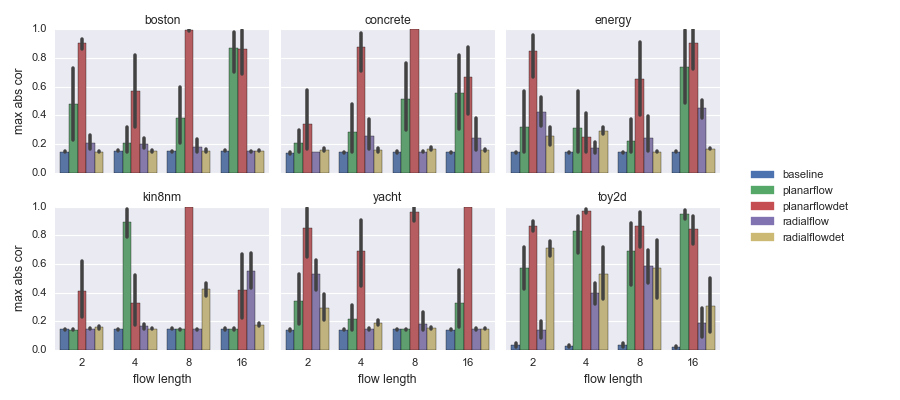

In [220]:
g = sns.FacetGrid(df_corr_expanded, col="datasetname", col_order=datasetnames, col_wrap=3, size=2.5, aspect=1.5, palette=palette)
g.map(sns.barplot, "flow length", "max abs cor", "modelname", palette=palette).set_titles(col_template="{col_name}")

g.fig.subplots_adjust(right=0.8)
plt.legend(handles=handles,
           loc="center left", bbox_to_anchor=(1.1,1))

In [221]:
g.savefig("Images/take10_correlations_max.pdf")

# show that plus is in fact not useful

In [ ]:
plus_folders = [["experiment1","withpercent"], ["experiment1","first_useful_hyperparameter_search"], ['experiment1','run_windows']]
__parent__ = os.path.realpath("..")
plus_folders = [os.path.join(__parent__, *fp) for fp in plus_folders]
plus_datasetnames = ["boston","concrete","energy","kin8nm", "yacht"]

best_hypers_plus = []
for dn in plus_datasetnames:
    best_hypers_plus += eva.get_best_hyper_autofix(
        dn, plus_folders,
        test_attrs=['best_val_error'],  #, 'best_val_error'
        modelnames=("baseline", "baselineplus", "baselinedet", "baselinedetplus"),
        percentages=None, take_best_n=1, #n_normflows=(1,2,3,4,8,20) # (10,25)
        check_finite_test_values=False
    )
    # or better plot them immediately here
df_plus = pd.DataFrame(eva.to_pandas_dict(best_hypers_plus))

In [ ]:
df_plus["plus"] = df_plus.modelname.apply(lambda n: "plus" in n)
df_plus["deterministic"] = df_plus.modelname.apply(lambda n: "det" in n)

In [ ]:
df_plus_grouped = df_plus.groupby(["datasetname", "deterministic"])

In [ ]:
target_values = dict([("boston", 3.014), ("concrete", 5.667), ("energy", 1.098), ("kin8nm", 0.091), ("yacht", 1.015)])
def func(s):
    diffs = s.best_val_error[s.plus].values - s.best_val_error[~s.plus].values
    return pd.DataFrame({"diff_error": diffs / target_values[s.datasetname.iloc[0]]})

df_plus_agg = df_plus_grouped.apply(func).reset_index()

In [ ]:
df_plus_agg

In [ ]:
fig_plus = sns.factorplot(x="deterministic", y="diff_error", hue="datasetname", data=df_plus_agg, kind="bar", legend=False, aspect=1.5);
fig_plus.fig.subplots_adjust(right=0.7)
plt.legend(loc="center right", bbox_to_anchor=[1.4,0.5])  #ncol=2

In [ ]:
fig_plus.savefig("Images/eva-plus.pdf")

# toy example extras

## analysis of approximate posterior

doit yourself

In [ ]:
palette = {
    "baseline" : (0.5, 0.5, 0.5, 0.8),
    "baselinedet" : (0.6, 0.6, 0.6, 0.8),
    "planarflow" : (0.0, 0.0, 1.0),
    "planarflowdet" : (0.0, 0.4, 1.0),
#     "planarflow" : (1.0, 0.0, 0.0),
#     "planarflowdet" : (1.0, 0.4, 0.0),
    "radialflow" : (1.0, 0.0, 0.0),
    "radialflowdet" : (1.0, 0.4, 0.0),
}

In [171]:
from scipy.ndimage.filters import gaussian_filter

In [ ]:
sns.set_style("ticks")

<IPython.core.display.Javascript object>


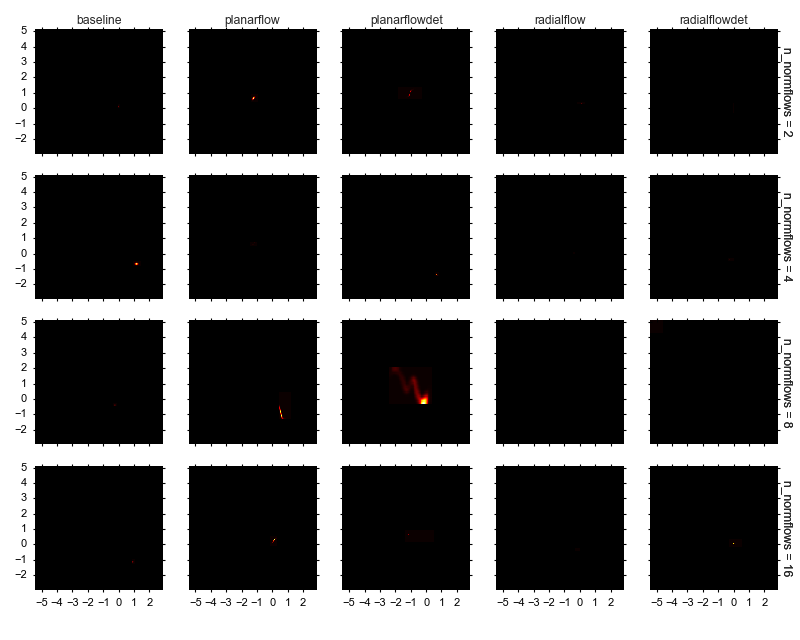

In [265]:
gaussian_filter_std = 2
df_toy2d = df_analysis[df_analysis.datasetname=="toy2d"]
g = sns.FacetGrid(df_toy2d, row="n_normflows", col="modelname", row_order=(2,4,8,16), col_order=modelnames_without_basedet,
                  size=2, aspect=1, margin_titles=True, ylim=[-3,3], xlim=[-3,3])

inf = float("inf")
ylim_min, ylim_max = inf, -inf
xlim_min, xlim_max = inf, -inf
def my_toy2d(hist, **kwargs):
    global last_im
    global ylim_min, ylim_max, xlim_min, xlim_max
    del kwargs['color']
    ax = plt.gca()
    H, yedges, xedges = hist.iloc[0] # histogram y, x are exactly reversed
    H = gaussian_filter(H, gaussian_filter_std)
    X, Y = np.meshgrid(xedges, yedges)
    last_im = ax.pcolormesh(X, Y, H, zorder=0, **kwargs)
    ax.set_aspect('equal')
#     ax.grid(True, axis='both', linestyle='-', linewidth=0.1, color=(1,1,1), zorder=5)
    ax.grid(False)
    ylim_min = min(ylim_min, min(yedges))
    ylim_max = max(ylim_max, max(yedges))
    xlim_min = min(xlim_min, min(xedges))
    xlim_max = max(xlim_max, max(xedges))
#     ax.set_xlim([min(xedges), max(xedges)])
#     ax.set_ylim([min(yedges), max(yedges)])
#     ax.set_xlim([-3,3])
#     ax.set_ylim([-3,3])
    ax.set_ylim([ylim_min, ylim_max])
    ax.set_xlim([xlim_min, xlim_max])
    ax.set_axis_bgcolor('black')
    ax.tick_params(axis='both', colors='black', labelcolor="black", direction="inout", zorder=10, length=3, width=1,
                  top=True, right=True)

g.map(my_toy2d, "toy_hist", cmap=plt.cm.hot).set_titles(col_template="{col_name}")
g.set_xlabels("")

# g.fig.tight_layout()
# g.fig.subplots_adjust(right=0.85)
# cbar_ax = g.fig.add_axes([0.9, 0.15, 0.02, 0.7])
# g.fig.colorbar(last_im, cax=cbar_ax)

In [266]:
g.savefig("Images/take10_distributions_withoutgrid_gaussianfilter%i.png" % gaussian_filter_std)

## average true posteriors

In [203]:
%matplotlib notebook
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from schlichtanders.mymatplotlib import Centre
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [204]:
import pandas as pd
import numpy as np
import theano
import theano.tensor as T
import theano_models as tm
import theano_models.deterministic_models as dm
import theano_models.probabilistic_models as pm

In [205]:
from experiment_toy_models import toy_likelihood
from schlichtanders.myfunctools import meanexp

In [206]:
toy2d = toy_likelihood(2)
toy2d_sampler = theano.function([], toy2d['outputs'])
toy2d_lik = theano.function(toy2d.logP['inputs'] + toy2d['inputs'], toy2d.logP['outputs'])

In [207]:
def make_prior(targets):
    total_size = tm.total_size(targets['inputs'])
    return tm.fix_params(pm.DiagGauss(output_size=total_size))
prior2 = make_prior(toy2d)
prior2_sampler = prior2.function()
prior2_logP = prior2.logP.function()

In [231]:
def compute_posterior2d(n_samples=800, normalizing_samples=1000, xlim=[-1.5, 1.5], ylim=[-1.5, 1.5]):
    # n_samples = 1000
    # 80% training data, however we need to average this over multiple trials
    toy2d_samples = [toy2d_sampler() for _ in xrange(n_samples)]

    # overall log likelihood of sample is simple sum
    def sample_lik2(w):
        return sum(toy2d_lik(s, w) for s in toy2d_samples)

    normalizing_constant2 = meanexp([sample_lik2(prior2_sampler()) for _ in xrange(normalizing_samples)])

    @np.vectorize
    def posterior2(w1, w2):
        return sample_lik2([w1, w2]) + prior2_logP([w1, w2]) - normalizing_constant2

    w1 = np.linspace(xlim[0], xlim[1], 200)
    w2 = np.linspace(ylim[0], ylim[1], 200)
    W1, W2 = np.meshgrid(w1, w2)
    num_posterior2 = posterior2(W1, W2)
    return W1, W2, num_posterior2

In [245]:
average_n = 10
W1, W2, num_posterior2 = np.mean([compute_posterior2d(xlim=[xlim_min, xlim_max], ylim=[ylim_min, ylim_max])
                          for _ in xrange(average_n)], axis=0)
# np.save("toy2d_averaged_true_posterior.npy", num_posterior2)

<IPython.core.display.Javascript object>


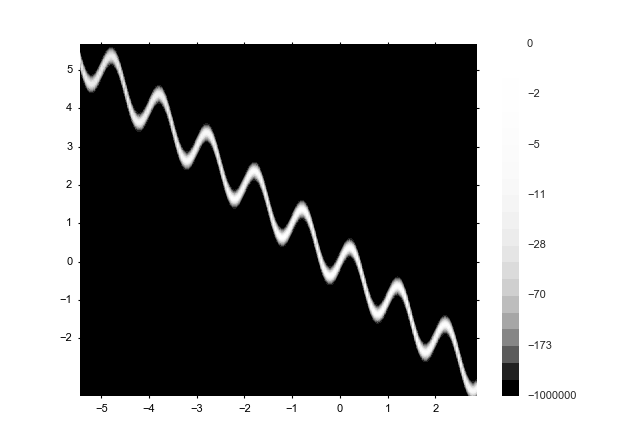

(-5.4457008721077491, 2.8718463469242961)

In [249]:
plt.figure()
levels = - np.r_[0, np.logspace(0, 2.5, 20)][::-1]
vmin=levels.min()
vmax=levels.max()
levels = np.r_[-10**6, levels]
plt.contourf(W1, W2, num_posterior2, levels, vmin=vmin, vmax=vmax, cmap=plt.cm.gray)
plt.colorbar()
plt.gca().tick_params(axis='both', colors='black', labelcolor="black", direction="inout", zorder=10, length=3, width=1,
                  top=True, right=True)
plt.yticks([5,4,3,2,1,0,-1,-2])
plt.ylim([ylim_min, ylim_max])
plt.xlim([xlim_min, xlim_max])

In [250]:
plt.savefig('Images/take10_true_posterior_gray.pdf')